
# <div style="text-align: center">"WeRateDogs" Data Wrangling project<div>
    Stage1: Project Preparation
1. Questions to be answered
2. Import Required Packages
​
​
​
## Stage2: Main Phases
1. Data Gathering
2. Data Assessing
3. Data Cleaning and Storing
4. Data Analyzing and Visualizing
5. Making Reports
​
# Stage1: Project Preparation
## 1. Questions to be answered
**Q1** What are the main devices/apps that WeRateDogs' users use?
​
**Q2** Is there a relationship between dog rates and retweet count?
​
**Q3** Is there a relationship between dog rates and favorite count?
​
**Q4** Is there a relationship between favorite count retweet count?
​
**Q5** What time that most of tweets are tweeted at?
​
**Q6** Is high confidence prediction meet reality more than low ones?
​
​
# 2. Import Required Packages
​
    


In [3]:
# import important laibary 
import os
import zipfile
import tweepy
from tweepy import OAuthHandler           
from timeit import default_timer as timer 
import requests
import re
import json
import glob
from PIL import Image
from io import BytesIO
from bs4 import BeautifulSoup
from scipy import stats
import warnings                            
warnings.filterwarnings('ignore')         
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

# Stage2: Main Phases
### 1. Data Gathering
** 3 datasets **
1.twitter_archive_enhanced.csv
2.image_predictions.tsv
3.tweet_json.txt


# 1.twitter_archive_enhanced.csv

In [4]:
# Set 'twitter_archive_enhanced.csv' download link to tw_ar_url variable
    # HINT: I got this link by 'Right-Click' on 'twitter_archive_enhanced.csv' at (Project Details) Lesson,
    # then 'Left-Click' on (Copy link address)
archive_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

# Determine a folder to save 'twitter_archive_enhanced.csv' file to
# This step could be ignored as long as the path is the same which I initiated jupyter notebook from
folder_name = '/Users/MyPC' # the same folder I initiated jupyter notebook from. 

# Determine the file name to be saved as in the determined folder
# This will be done by splitting url text and get final element [-1]
archive_file_name = archive_url.split('/')[-1]

# Check extracted name
archive_file_name

'twitter-archive-enhanced.csv'

In [5]:
archive_response = requests.get(archive_url)

In [6]:
#Open the file using os library in 'wb' mode, and write tw_ar_response.contents to new CSV file and save it
with open(os.path.join(archive_file_name), mode='wb') as file:
              file.write(archive_response.content)

## file 1 read and import 

In [7]:
# import twitter_archive_enhanced.csv to workspace using pandas DataFrame
archive_df = pd.read_csv(archive_file_name)

In [8]:
# Check imported df before proceeding to next step
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


# 2. file_2 read  image_predictions.tsv

In [9]:
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Determine the file name to be saved as in the default folder
# This will be done by splitting url text and get final element [-1]
image_file_name = image_url.split('/')[-1]

# Check extracted name
image_file_name

'image-predictions.tsv'

In [10]:
# Request the file using requests and put it in tw_im_response variable
image_response = requests.get(image_url)

In [11]:
# open file 
if not os.path.isfile(image_file_name):
    with open (image_file_name, mode='wb') as file:
        file.write(image_response.content)

In [12]:
# import image_predictions.tsv to workspace using pandas DataFrame
image_df = pd.read_csv(image_file_name, sep='\t')
image_df.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


# File Num 3   tweet_json.txt - API file

In [13]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'secuirty key'
consumer_secret = 'secuirty key'
access_token = 'secuirty key'
access_secret = 'secuirty key'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [14]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        print(type(line))
        tweet = json.loads(line)
        print(type(tweet))
        break

<class 'str'>
<class 'dict'>


In [15]:
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7497,35502
1,892177421306343426,5564,30726
2,891815181378084864,3684,23109
3,891689557279858688,7678,38789
4,891327558926688256,8282,37059


In [16]:
# new approach for reading the api_df
df_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df_now = pd.DataFrame(df_list)
api_df_now.sample(10)

,tweet_id,retweet_count,favorite_count,user_count
1063,738156290900254721,622,2444,8869478
1191,715009755312439296,1186,4043,8869478
217,848690551926992896,4160,24431,8869468
805,769212283578875904,1697,5344,8869474
853,761227390836215808,1544,5263,8869476
2278,666996132027977728,81,226,8869482
1015,744234799360020481,75802,153082,8869478
395,823269594223824897,9782,0,8869471
1173,717009362452090881,935,3153,8869478
1373,699779630832685056,1202,2674,8869479


# 2. Data Assessing

#### Section 1: Assessing Effort

In [17]:
# Using pd.set_option to control the column text width pandas will display, for more effective visual assessment
pd.set_option("display.max_colwidth", -1)

# Using pd.set_option to control the maximum columns pandas will display, for more effective visual assessment
pd.set_option('display.max_columns', None)

In [18]:
# Display the archive_df table
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
794,773336787167145985,NaN,NaN,2016-09-07 01:47:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Fizz. She thinks love is a social construct consisting solely of ideals perpetuated by mass media 11/10 woke af https:/…,7.713808e+17,4.196984e+09,2016-09-01 16:14:48 +0000,"https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1,https://twitter.com/dog_rates/status/771380798096281600/photo/1",11,10,Fizz,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
651,792773781206999040,NaN,NaN,2016-10-30 17:02:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Monster. Not an actual monster tho. He's showing you his tongue. Very impressive Monster. 12/10 would snug https://t.co/RhaPExuxJL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792773781206999040/photo/1,12,10,Monster,None,None,None,None
1529,690248561355657216,NaN,NaN,2016-01-21 19:04:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maxwell. That's his moped. He rents it out for others to use as long as he can come also. 11/10 great dog https://t.co/IF5kKaO945,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690248561355657216/photo/1,11,10,Maxwell,None,None,None,None


In [19]:
# Check the 'Not a NaN' values in
# 'in_reply_to' columns ['in_reply_to_status_id, 'in_reply_to_user_id'], 
# for knowing the data more
archive_df_reply_check = archive_df[~archive_df['in_reply_to_status_id'].isnull()]
archive_df_reply_check.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1479,693582294167244802,6.935722e+17,1.198989e+09,2016-01-30 23:51:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Personally I'd give him an 11/10. Not sure why you think you're qualified to rate such a stellar pup.\n@CommonWhiteGirI,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The 13/10 also takes into account this impeccable yard. Louis is great but the future dad in me can't ignore that luscious green grass,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1330,705786532653883392,7.032559e+17,4.196984e+09,2016-03-04 16:06:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",NaN,NaN,NaN,https://twitter.com/dog_rates/status/705786532653883392/photo/1,11,10,None,None,None,pupper,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
346,831926988323639298,8.319030e+17,2.068372e+07,2017-02-15 18:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@UNC can confirm 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [20]:
# Check the 'Not a NaN values' in 
# 'retweeted' columns ['retweeted_status_id, 'retweeted_status_user_id', 'retweeted_status_timestamp'], 
# for knowing the data more
archive_df_retweeted_check = archive_df[~archive_df['retweeted_status_id'].isnull()]
archive_df_retweeted_check.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
603,798628517273620480,NaN,NaN,2016-11-15 20:47:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7,6.675094e+17,4.196984e+09,2015-11-20 01:06:48 +0000,"https://twitter.com/dog_rates/status/667509364010450944/photo/1,https://twitter.com/dog_rates/status/667509364010450944/photo/1",12,10,None,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,"https://twitter.com/dog_rates/status/817423860136083457/video/1,https://twitter.com/dog_rates/status/817423860136083457/video/1",13,10,Ken,None,None,None,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X…,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006473256960/photo/1,12,10,Dawn,None,None,None,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Klein. These pics were taken a month apart. He knows he's a stud now. 12/10 total heartthrob https://t.co/guDkLrX8zV,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,"https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1,https://twitter.com/dog_rates/status/769940425801170949/photo/1",12,10,Klein,None,None,None,None


In [21]:
# Check if 'source' column contains any device other than 'iPhone', if yes, it could be a part of our analysis
archive_df_sourcecheck = archive_df[~archive_df['source'].str.contains('iPhone', na=False)]
archive_df_sourcecheck.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1051,742534281772302336,NaN,NaN,2016-06-14 01:49:03 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",NaN,NaN,NaN,https://vine.co/v/iLTZmtE1FTB,11,10,None,doggo,None,None,None
746,780074436359819264,NaN,NaN,2016-09-25 16:00:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy https://t.co/dVm5Hgdpeb,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None
886,759943073749200896,NaN,NaN,2016-08-01 02:45:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a wicked fast pupper. 12/10 camera could barely keep pup https://t.co/HtAR6gpUAu,NaN,NaN,NaN,https://vine.co/v/5AJm5pq7Kav,12,10,None,None,None,pupper,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10 https://t.co/wJX74TSgzP,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Jameson. He had a few too many in the name of freedom. I can't not respect that. 11/10 'Merica https://t.co/8zQvXM6pG5,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684286914561/photo/1,11,10,Jameson,None,None,None,None


In [22]:
# Get main info about archive_df using .info() method
print('archive_df Info')
print('')
print(archive_df.info())

archive_df Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo           

In [23]:
# Check duplicates in archive_df using .duplicated().sum() method
print('archive_df duplicates')
print('')
print(archive_df.duplicated().sum())

archive_df duplicates

0


In [24]:
# Check 'archive_df' unique values
print('archive_df unique values')
print('')
print(archive_df.nunique())

archive_df unique values

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64


In [25]:
# Check 'source' values counts, to determine if has valuable info to be considered
print('archive_df.source values_counts')
print('')
print(archive_df.source.value_counts())

archive_df.source values_counts

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64


In [26]:
# Check dog stages columns' values counts, to know how to deal with it
print('archive_df.doggo values_counts')
print('')
print(archive_df.doggo.value_counts())

print('-'*45)
print('archive_df.floofer values_counts')
print('')
print(archive_df.floofer.value_counts())

print('-'*45)
print('archive_df.pupper values_counts')
print('')
print(archive_df.pupper.value_counts())

print('-'*45)
print('archive_df.puppo values_counts')
print('')
print(archive_df.puppo.value_counts())

archive_df.doggo values_counts

None     2259
doggo    97  
Name: doggo, dtype: int64
---------------------------------------------
archive_df.floofer values_counts

None       2346
floofer    10  
Name: floofer, dtype: int64
---------------------------------------------
archive_df.pupper values_counts

None      2099
pupper    257 
Name: pupper, dtype: int64
---------------------------------------------
archive_df.puppo values_counts

None     2326
puppo    30  
Name: puppo, dtype: int64


In [27]:
# Check rating_denominator value_counts
archive_df.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [28]:
# Check rating_numerator value_counts
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [29]:
# Display the image_df table
image_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True
1363,761334018830917632,https://pbs.twimg.com/media/CpDNQGkWEAENiYZ.jpg,1,Norwegian_elkhound,0.822936,True,malinois,0.086152,True,German_shepherd,0.063333,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
1904,852189679701164033,https://pbs.twimg.com/media/C9OV99SXsAEmj1U.jpg,1,barrow,0.423150,False,Bernese_mountain_dog,0.415374,True,EntleBucher,0.067345,True
16,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False
2053,887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
913,700864154249383937,https://pbs.twimg.com/media/Cbn4OqKWwAADGWt.jpg,1,kuvasz,0.805857,True,Great_Pyrenees,0.187272,True,Samoyed,0.003491,True
1550,793120401413079041,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,Labrador_retriever,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True


In [30]:
# Get main info about image_df using .info() method
print('image_df Info')
print('')
print(image_df.info())

image_df Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [31]:
# Check duplicates in image_df using .duplicated().sum() method
print('image_df duplicates')
print('')
print(image_df.duplicated().sum())

image_df duplicates

0


In [32]:
# check 'image_df' unique values
print('image_df unique values')
print('')
print(image_df.nunique())

image_df unique values

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64


In [33]:
# check 'p1' values counts
print('image_df.p1 values_counts')
print('')
print(image_df.p1.value_counts())

image_df.p1 values_counts

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
stove                 1  
long-horned_beetle    1  
cheeseburger          1  
pedestal              1  
Japanese_spaniel      1  
Name: p1, Length: 378, dtype: int64


#### api_df Table

In [34]:
api_df_now.sample(10)

,tweet_id,retweet_count,favorite_count,user_count
563,800443802682937345,4323,0,8869474
288,836648853927522308,541,0,8869468
2284,666804364988780544,84,217,8869482
2328,666033412701032449,39,109,8869482
1199,714251586676113411,810,3183,8869478
2257,667211855547486208,223,453,8869481
1899,674075285688614912,267,940,8869481
815,767754930266464257,5324,15855,8869476
1779,676946864479084545,351,1672,8869481
384,824775126675836928,3467,14786,8869471


In [35]:
# get main info about api_df using .info() method
print('api_df Info')
print('')
print(api_df_now.info())

api_df Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   user_count      2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB
None


# Section 2: Assessing Result

## Tidiness issues
(1) Multiple variables are stored in one column
1. timestamp column's values in archive_df table should be splitted into Date and Time 2 column's.

(2) Column headers are values, not variable names.
2. in archive_df table Column headers (['doggo'] , ['floofer'] , ['pupper'] , ['puppo']) are values, not a variable names. That resulting 1 variable ['dog_stage'] is stored 4 columns in a messy way.

3. in image_df table Column headers (['p1'] , ['p2'] , ['p3']) are values, not a variable names. That resulting 2 variables ['prediction_number' and 'prediction_result'] are stored 3 columns in a messy way.

4. in image_df table Column headers (['p1_conf'] , ['p2_conf'] , ['p3_conf']) are values, not a variable names. That resulting 2 variables ['prediction_number' and 'prediction_confident'] are stored 3 columns in a messy way.

5. in image_df table Column headers (['p1_dog'] , ['p2_dog'] , ['p3_dog']) are values, not a variable names. That resulting 2 variables ['prediction_number' and 'prediction_validity'] are stored 3 columns in a messy way.

(3) A single observational unit is stored in multiple tables.
6. api_df table should be a part of archive_df table.

## Quality issues
### (1) Completeness Issues
NO Completeness ISSUE DETECTED.

### (2) Validity Issues
1. The p column's (['p1], ['p1_conf'] , ['p1_dog'] , etc.]) in image_df table has 'Non-descriptive columns’ names needs to be adjusted.

2. There are Retweets and replies column's and rows in archive_df and that doesn't conform to analysis scope schema, so they needs to be dropped.

3. There are some records in archive_df and that doesn't has expanded_urls, which means no image exist, so they needs to be dropped.

expanded_urls

3. timestamp column's values in archive_df table contains extra '+0000' needs to be removed.

4. retweeted_status_timestamp column's values in archive_df table contains extra '+0000'.

### (3) Accuracy Issues
1. name column's values in archive_df table contains inaccurate pet names like the letter “a” and “an”.

2. about 11 records in rating_numerator and rating_denominator columns' values in archive_df table are aggregated and featuring many dogs based on dog counts in the picture, while it's supposed to be for 1 dog. That clearly appears in [['rating_numerator'] > 40]

3. about 5 records in rating_numerator and rating_denominator columns' values in archive_df table are inaccurate -mostly during text extraction, 1st digits occurrence took instead of 2nd one- and needed to be corrected, That clearly appears in [['tweet_id'] == 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]]

4. about 3 records in rating_numerator column's values in archive_df table is inaccurate -mostly during text extraction, after decimal point value taken instead of the whole value- and needed to be corrected, That clearly appears in [['tweet_id'] == 786709082849828864, 778027034220126208, 680494726643068929]]

5. 1 records in rating_numerator and rating_denominator columns' values in archive_df table are inaccurate -mostly during text extraction, 1st digits occurrence while it is not a rating- and needed to be totally removed, That clearly appears in [['tweet_id'] == 810985000000000000]]

### (4) Consistency Issues
1. tweet_id columns' Dtypes in archive_df, image_df, and api_df tables are int64 while no calculus will be made, so it's better to be str.

2. in_reply_to_status_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.**

3. in_reply_to_user_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.**

4. timestamp column's Dtype in archive_df table is object (str) while it's supposed to be datetime.

5. retweeted_status_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.**

6. retweeted_status_user_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.**

7. retweeted_status_timestamp column's Dtype in archive_df table is object (str) while it's supposed to be datetime.

8. (['doggo'] , ['floofer'] , ['pupper'] , ['puppo']) columns' in archive_df table contains Inconsistent values regarding representation of null values, as “None” strings in the (doggo, floofer, pupper, puppo) columns.

9. ['name'] column in archive_df table contains Inconsistent values regarding representation of null values, as “None” strings.

10. (['doggo'] , ['floofer'] , ['pupper'] , ['puppo']) columns' Dtype in archive_df table are object (str) while it supposed to be category dtype.

11. rating_numerator column's Dtypes in archive_df tables is int64 while -originally- it has decimal values at text column, so it should be float.

## 3. Data Cleaning and Storing
Cleaning data process will go through 2 sections:

1. Cleaning Preparation.

2. Cleaning Process.

3. Cleaning Result Storing.

Important Note Data issues will be cleaned by group, if a specific group(s) issues requires same cleaning efforts/code

### Section 1: Cleaning Preparation
*** Making a copy from the 3 dfs, to keep the original ones AS IS. ***

In [36]:
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
api_df_clean = api_df_now.copy()

In [37]:
# Test the copied _clean dfs

# Using pd.reset_option to back to default column text width pandas will display
pd.reset_option("display.max_colwidth")

# Using pd.reset_option to back to default maximum columns pandas will display
pd.reset_option('display.max_columns')

In [38]:
archive_df_clean.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
858,763837565564780549,NaN,NaN,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's touching a butt. Couldn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763837565...,11,10,Alfie,None,None,None,None


In [39]:
image_df_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.58378,True,Italian_greyhound,0.129683,True,toy_terrier,0.089153,True


In [40]:
api_df_clean.sample(1)

,tweet_id,retweet_count,favorite_count,user_count
738,778624900596654080,1004,4609,8869474


# Section 2: Cleaning Process

## Group 1: "No Action Needed" Group
All of below data issues will not affect our analysis scope, so it will be as it is without any CLEANING action from our side

** Quality - Validity Issues: **

** 4. retweeted_status_timestamp column's values in archive_df table contains extra '+0000'. **
### Quality - Accuracy Issues:

1. name column's values in archive_df table contains inaccurate pet names like the letter “a” and “an”.
Quality - Consistency Issues:

2. in_reply_to_status_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.
3. in_reply_to_user_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.
5. retweeted_status_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.
6. retweeted_status_user_id column's Dtype in archive_df table is float64 while no calculus will be made, so it's better to be str.
7. retweeted_status_timestamp column's Dtype in archive_df table is object (str) while it's supposed to be datetime.
9. ['name'] column in archive_df table contains Inconsistent values regarding representation of null values, as “None” strings.

## Group 2: "Getting Original Tweets with Images" Group
**Cleaning all of the below data issues will help us getting original tweets with image only**

**Quality - Validity Issues:**

#### 2. There are Retweets and replies column's and rows in archive_df and that doesn't conform to analysis scope schema, so they needs to be dropped.

3. There are some records in archive_df and that doesn't has expanded_urls, which means no image exist, so they needs to be dropped.

**Define**

Use the image_prediction table to guide the selection and removal of tweets without photos in the archive table**
Filter archive_df to contains only (Original Tweets) that has (image).
Drop the records in archive_df and that doesn't has expanded_urls.
Drop Retweets and replies coulmns in archive_df.

**Code & Test**

In [41]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_df_clean.tweet_id.unique())

# confirming that all the tweets with images exist in the archive dataset
len(tweets_with_image) == archive_df_clean.tweet_id.isin(tweets_with_image).sum()

# Cleaning in action ;)
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2075 non-null   object 
 4   source                      2075 non-null   object 
 5   text                        2075 non-null   object 
 6   retweeted_status_id         81 non-null     float64
 7   retweeted_status_user_id    81 non-null     float64
 8   retweeted_status_timestamp  81 non-null     object 
 9   expanded_urls               2075 non-null   object 
 10  rating_numerator            2075 non-null   int64  
 11  rating_denominator          2075 non-null   int64  
 12  name                        2075 non-null   object 
 13  doggo                       2075 

In [42]:
# Throwback to the archive dataset to extract the tweets that include data in the retweet_status_id.
retweet_entries = archive_df_clean.retweeted_status_id.notnull()
archive_df_clean[retweet_entries].shape[0]

# Dropping the retweets from the archive data set
archive_df_clean = archive_df_clean[~retweet_entries]

# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

In [43]:
# Follow the same logic as above but with the column in_reply_to_status_id

# Throwback to the archive dataset to extract the tweets that include data in the retweet_status_id.
replies_entries = archive_df_clean.in_reply_to_status_id.notnull()
archive_df_clean[replies_entries].shape[0]

# Dropping the retweets from the archive data set
archive_df_clean = archive_df_clean[~replies_entries]

# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

In [44]:
# Now we check the image_prediction table for extra tweet ids not in the archive table
np.logical_not(image_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))


# Dropping the retweets and replies ids from the image prediction dataframe
image_df_clean[~np.logical_not(image_df_clean.tweet_id.isin(list(archive_df_clean.tweet_id)))]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [45]:
# TEST
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
# Drop Retweets and replies columns in archive_df_clean.
archive_df_clean = archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [47]:
archive_df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1290,708130923141795840,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None
2252,667801013445750784,2015-11-20 20:25:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMIGOD 12/10 https://t.co/SVMF4Frf1w,https://twitter.com/dog_rates/status/667801013...,12,10,None,None,None,None,None


In [48]:
# TEST
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


## Group 3: "Dogtionary Cleaning" Group
**All of the below data issues relating to dog_stage name based on dogtionary items**

Tidy Issue - Column headers are values, not variable names.

#### 2. in archive_df table Column headers (['doggo'] , ['floofer'] , ['pupper'] , ['puppo']) are values, not a variable names. That resulting 1 variable ['dog_stage'] is stored 4 columns in a messy way.
**Quality - Consistency Issues:**

8. (['doggo'] , ['floofer'] , ['pupper'] , ['puppo']) columns' in archive_df table contains Inconsistent values regarding representation of null values, as “None” strings in the (doggo, floofer, pupper, puppo) columns.

10. (['doggo'] , ['floofer'] , ['pupper'] , ['puppo']) columns' Dtype in archive_df table are object (str) while it supposed to be category dtype.

**Define**

Concatenate the 4 ['doggo', 'puppo', 'pupper','floofer'] columns in one new column inarchive_df.
Replace 'None' values with an empty str '' in the new column.
Replace the empty str '' values with NaN values in the new column.
Separate any value contains more than 1 stage by a dash (-) sign, using replace method.
Change the columns Dtype from str to category using .astype() method.


**Code & Test**

In [49]:
# Create a new column 'dog_stage' in archive_df_clean contains the concatenated values in ['doggo', 'puppo', 'pupper','floofer'] columns
archive_df_clean['dog_stage'] = archive_df_clean['doggo'] + archive_df_clean['puppo'] + archive_df_clean['pupper'] + archive_df_clean['floofer']
# Test
archive_df_clean['dog_stage'].sample(5)

1655    NoneNoneNoneNone
2018    NoneNoneNoneNone
268     NoneNoneNoneNone
1298    NoneNoneNoneNone
1793    NoneNoneNoneNone
Name: dog_stage, dtype: object

In [50]:
# Replace 'None' values with an empty str '' in the 'dog_stage' new column
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('None', '')
# Test
archive_df_clean.dog_stage.value_counts()


                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [51]:
# Replace the empty str '' values with NaN values in the 'dog_stage' new column
archive_df_clean.dog_stage = archive_df_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True)
# Test
archive_df_clean.dog_stage.value_counts()

pupper          201
doggo            63
puppo            22
doggopupper       8
floofer           7
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

In [52]:
# Separate any value contains more than 1 stage by a dash (-) sign, using replace method
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('doggopupper', 'doggo-pupper')
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('doggofloofer', 'doggo-floofer')
archive_df_clean.dog_stage = archive_df_clean.dog_stage.str.replace('doggopuppo', 'doggo-puppo')

# Test
archive_df_clean.dog_stage.value_counts()

pupper           201
doggo             63
puppo             22
doggo-pupper       8
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

In [53]:
# Change dog_stage column Dtype from str to category using .astype() method in archive_df_clean
archive_df_clean.dog_stage = archive_df_clean.dog_stage.astype('category')

# Test
archive_df_clean.dog_stage.sample()

2006    NaN
Name: dog_stage, dtype: category
Categories (7, object): ['doggo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo', 'floofer', 'pupper', 'puppo']

## Group 4: "Dog Rating" Group
**All of the below data cleaning issues are relating to dog rating columns ['rating_numerator'] and ['rating_denominator']
**
**Quality - Accuracy Issues:**

2. about 11 records in rating_numerator and rating_denominator columns' values in archive_df table are aggregated and featuring many dogs based on dog counts in the picture, while it's supposed to be for 1 dog. That clearly appears in [['rating_numerator'] > 40]

3. about 5 records in rating_numerator and rating_denominator columns' values in archive_df table are inaccurate -mostly during text extraction, 1st digits occurrence took instead of 2nd one- and needed to be corrected, That clearly appears in [['tweet_id'] == 740373189193256964, 722974582966214656, 716439118184652801, 682962037429899265, 666287406224695296]]

4. about 3 records in rating_numerator column's values in archive_df table is inaccurate -mostly during text extraction, after decimal point value taken instead of the whole value- and needed to be corrected, That clearly appears in [['tweet_id'] == 786709082849828864, 778027034220126208, 680494726643068929]]

5. 1 records in rating_numerator and rating_denominator columns' values in archive_df table are inaccurate -mostly during text extraction, 1st digits occurrence while it is not a rating- and needed to be totally removed, That clearly appears in [['tweet_id'] == 810985000000000000]]

Quality - Consistency Issues:

10. rating_numerator column's Dtypes in archive_df tables is int64 while -originally- it has decimal values at text column, so it should be float.
Define
Using regex, extract the right dog rating (rating_numerator and rating_denominator) as could as possible from text column and put the result in new column ['temp_rating'].
Test the result randomly and also specifically using above known tweet_ids.
The 3 and 5 invalid records

**1 invalid record**

Drop the record which contains wrong value 24/7 and has (No rating at text column).
Replace any still-wrong value programmatically or manually, according to the number of occurrence.
11 aggregated dog rating records

Split ['temp_rating'] column into 2 new columns using "/" delimiter, to create new_numerator and new_denominator columns.

Convert Dtypes for the new 2 columns to float.

Getting dogs_count by devide archive_df_clean.new_numerator >= 40]/10.

Assign the value 10 for new_denominator column.

Create the FINAL new rating column with a name 'dog_rating' using calculus (new_numerator/new_denominator)*100, rounding the result to nearest decimal 1 point.

**Code & Test**

In [54]:
# TEST
# Based on above random rest result, let's Test the 3 Wrong Values relating to (decimal issue)
#archive_df_clean.query('tweet_id == "786709082849828864"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "778027034220126208"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "680494726643068929"') # --> another testing methodology
archive_df_clean.query('tweet_id == "786709082849828864" or tweet_id == "778027034220126208" or tweet_id == "680494726643068929"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,NaN
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,pupper
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,NaN


In [68]:
# Replace the 5 wrong values with the right ones from text archive_df_clean in the 'temp_rating' new column
archive_df_clean
#archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('50/50','11/10')
#archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('4/20', '13/10')
#archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('9/11', '14/10')
#archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('7/11', '10/10')
#archive_df_clean['temp_rating'] = archive_df_clean['temp_rating'].str.replace('1/2', '9/10')

# TEST
# Test the 5 record which contains the Wrong Values relating to (2nd occurrence)
#archive_df_clean.query('tweet_id == "740373189193256964"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "722974582966214656"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "716439118184652801"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "682962037429899265"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "666287406224695296"') # --> another testing methodology
#archive_df_clean.query('tweet_id == "740373189193256964" or tweet_id == "722974582966214656" or tweet_id == "716439118184652801" or tweet_id == "682962037429899265" or tweet_id == "666287406224695296"')

AttributeError: Can only use .str accessor with string values!

In [68]:
# Split ['temp_rating'] into 2 new columns using "/" delimiter with new Dtype float using .astype() method
archive_df_clean[['new_numerator','new_denominator']] = archive_df_clean.temp_rating.str.split("/",expand=True).astype(float)

# TEST
# Check the 2 new created columns 
archive_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,13/10,13.0,10.0


In [69]:
# TEST
# Check the 2 new created columns Dtype
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1970 non-null   int64   
 1   timestamp           1970 non-null   object  
 2   source              1970 non-null   object  
 3   text                1970 non-null   object  
 4   expanded_urls       1970 non-null   object  
 5   rating_numerator    1970 non-null   int64   
 6   rating_denominator  1970 non-null   int64   
 7   name                1970 non-null   object  
 8   doggo               1970 non-null   object  
 9   floofer             1970 non-null   object  
 10  pupper              1970 non-null   object  
 11  puppo               1970 non-null   object  
 12  dog_stage           303 non-null    category
 13  temp_rating         1970 non-null   object  
 14  new_numerator       1970 non-null   float64 
 15  new_denominator     1970 non-null   fl

In [70]:
# Solve the 11 aggregated dog rating records problem
# Calculating the dogs counts in the tweets featuring many dogs
dogs_count = (archive_df_clean.new_denominator[archive_df_clean.new_numerator >= 40]/10).astype(int)

#TEST
# Check the dog_count with their indices:
print(dogs_count)

433      7
902     15
979      1
1120    17
1228     9
1254     8
1274     5
1351     5
1433     4
1635    11
1779    12
1843     8
2074     1
Name: new_denominator, dtype: int32


In [71]:
# Below code will modify ['new_numerator', 'new_denominator'] for values >= 40
# The new values will be the result of:
    # new_numerator/dogs_count -> for new_numerator column.
    # 10                       -> for new_numerator column.
archive_df_clean.loc[archive_df_clean.new_numerator >= 40, ['new_numerator', 'new_denominator']] = [archive_df_clean.rating_numerator[archive_df_clean.new_numerator >= 40]/dogs_count , 10]

#TEST
# Check [new_numerator and new_denominator] modified values for 'rating_numerator >= 40
archive_df_clean.query('rating_numerator >= 40') #and in_reply_to_status_id == "NaN" and retweeted_status_id == "NaN"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None,NaN,84/70,12.00,10.0
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,NaN,9.75/10,9.75,10.0
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None,NaN,165/150,11.00,10.0
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None,NaN,1776/10,1776.00,10.0
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None,NaN,204/170,12.00,10.0
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None,NaN,11/10,11.00,10.0
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None,NaN,99/90,11.00,10.0
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None,NaN,80/80,10.00,10.0
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None,NaN,45/50,9.00,10.0
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None,NaN,60/50,12.00,10.0


In [72]:
# Create the FINAL new rating column with name dog_rating
# It will calculate (new_numerator/new_denominator)*100, rounding the result to nearest decimal 1 point
archive_df_clean['dog_rating'] = round((archive_df_clean['new_numerator']/archive_df_clean['new_denominator'])*100, 1)

# TEST
# Check the value_counts for the new created column ['dog_rating']
archive_df_clean['dog_rating'].value_counts().sort_values()

135.0        1
17760.0      1
112.7        1
0.0          1
112.6        1
4200.0       1
97.5         1
10.0         4
20.0         9
40.0        15
30.0        19
50.0        32
60.0        32
140.0       34
70.0        51
80.0        95
90.0       151
130.0      254
110.0      398
100.0      419
120.0      450
Name: dog_rating, dtype: int64

In [73]:
# TEST
# Check the new created column ['dog_rating'] in df context
pd.reset_option("display.max_colwidth")
archive_df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating
755,778748913645780993,2016-09-22 00:13:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Mya (pronounced ""mmmyah?""). Her head i...",https://twitter.com/dog_rates/status/778748913...,11,10,Mya,None,None,None,None,NaN,11/10,11.0,10.0,110.0
1717,680191257256136705,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None,pupper,11/10,11.0,10.0,110.0


In [74]:
# TEST
#Precaution Test in case of failure dropping NON-ORIGINAL Tweets
archive_df_clean.query('new_denominator >= 15')# and in_reply_to_status_id == "NaN" and retweeted_status_id == "NaN"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating


## Group 5: "DateTime Issue" Group
**All of the below codes relating to DateTime issue**

**Tidy Issues - Multiple variables are stored in one column:**

1. timestamp column's values in archive_df table should be splitted into Date and Time 2 column's.
Quality - (2) Validity Issues

3. timestamp column's values in archive_df table contains extra '+0000' needs to be removed.
Quality - (2) Consistency Issues

4. timestamp column's Dtype in archive_df table is object (str) while it's supposed to be datetime.
Define
Convert timestamp Dtype from str to datetime using pd.to_datetime().
Create a new column ['date'] contains date only.
Create a new column ['time'] contains time only.


### Code

In [75]:
# Convert timestamp Dtype from str to datetime using pd.to_datetime()
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])

# Create a new column ['date'] contains date only
archive_df_clean['date'] = archive_df_clean['timestamp'].dt.date
archive_df_clean['date'] = pd.to_datetime(archive_df_clean['date'])

# Create a new column ['time'] contains time only
archive_df_clean['time'] = [datetime.datetime.time(d) for d in archive_df_clean['timestamp']]

In [76]:
# TEST
# Check the new created columns ['date'] and ['time'] in df context
archive_df_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,temp_rating,new_numerator,new_denominator,dog_rating,date,time
1224,714214115368108032,2016-03-27 22:14:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Easter from the squad! 🐇🐶 13/10 for all ...,https://twitter.com/dog_rates/status/714214115...,13,10,None,None,None,None,None,NaN,13/10,13.0,10.0,130.0,2016-03-27,22:14:49
639,793256262322548741,2016-11-01 01:00:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,https://twitter.com/dog_rates/status/793256262...,12,10,None,None,None,None,None,NaN,12/10,12.0,10.0,120.0,2016-11-01,01:00:05


In [77]:
# TEST
# Check datatype for the new created columns ['date'], ['time'], and ['hour']
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1970 non-null   int64              
 1   timestamp           1970 non-null   datetime64[ns, UTC]
 2   source              1970 non-null   object             
 3   text                1970 non-null   object             
 4   expanded_urls       1970 non-null   object             
 5   rating_numerator    1970 non-null   int64              
 6   rating_denominator  1970 non-null   int64              
 7   name                1970 non-null   object             
 8   doggo               1970 non-null   object             
 9   floofer             1970 non-null   object             
 10  pupper              1970 non-null   object             
 11  puppo               1970 non-null   object             
 12  dog_stage           303 non-null  

## Group 6: "Feature Engineering" Group
** All of the below codes relating to finding new valuable info in the dataset, for augmenting EDA**

Getting source App/Device from source column in archive_df.

Create ['hour'] column in *archive_df

**Define**
Extract device/app from source column using regex could be useful for EDA.
Create a new column ['hour'] contains the hour only.
**Code & Test**

In [78]:
# Use regex to extract the devices/Apps in the source column in archive_df_clean
archive_df_clean.source  = archive_df_clean.source.str.extract(r'((Twitter for iPhone)|(Vine - Make a Scene)|(Twitter Web Client)|(TweetDeck))').astype(str)

# TEST
archive_df_clean.source.value_counts()

Twitter for iPhone    1931
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [79]:
# Change source column Dtype from str to category using .astype() method in archive_df_clean
archive_df_clean.source = archive_df_clean.source.astype('category')

# TEST
archive_df_clean.source.sample()

429    Twitter for iPhone
Name: source, dtype: category
Categories (3, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone']

In [70]:
# Create a new column ['hour'] contains the hour only
archive_df_clean['hour'] = archive_df_clean['timestamp'].dt.hour

# TEST
# Check the new created column ['hour'] in df context
pd.reset_option("display.max_colwidth")
archive_df_clean.sample()

AttributeError: Can only use .dt accessor with datetimelike values

## Group 7: "Dropping Extraneous columns" Group
Below code will drop all not-needed columns in archiv_df

**Code**

In [71]:
# Drop all unwanted columns in archive_df_clean.
archive_df_clean = archive_df_clean.drop(['rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'temp_rating', 'new_numerator', 'new_denominator'], axis=1)

KeyError: "['temp_rating' 'new_numerator' 'new_denominator'] not found in axis"

In [72]:
# TEST
# Check archive_df_clean after dropping all not-needed columns
archive_df_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
1868,675166823650848770,2015-12-11 04:14:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arnold. He broke his leg saving a hand...,https://twitter.com/dog_rates/status/675166823...,10,10,Arnold,None,None,None,None,NaN


In [73]:
# TEST
# Check archive_df_clean after last modifications
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   object  
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   doggo               1971 non-null   object  
 9   floofer             1971 non-null   object  
 10  pupper              1971 non-null   object  
 11  puppo               1971 non-null   object  
 12  dog_stage           303 non-null    category
dtypes: category(1), int64(3), object(9)
memory usage: 202.5+ KB


## Group 8: "Data Type Issues" Group
**All of the below codes relating to datatype issues**

Quality - (2) Consistency Issues
1. tweet_id columns' Dtypes in archive_df, image_df, and api_df tables are int64 while no calculus will be made, so it's better to be str.
Define
Convert tweet_id columns' Dtypes in archive_df, image_df, and api_df tables str, using .astype() method

**Code**

In [74]:
# Change tweet_id Dtype from int to str using .astype() method in the 3 dfs (archive_df_clean, image_df_clean, and api_df_clean)
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype(str)
image_df_clean.tweet_id = image_df_clean.tweet_id.astype(str)
api_df_clean.tweet_id = api_df_clean.tweet_id.astype(str)

In [75]:
archive_df_clean.tweet_id.dtype, image_df_clean.tweet_id.dtype, api_df_clean.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

## image_df
**Group 9: "image_df Tidy & Quality Issues" Group**
**All of the below codes relating to image_df Tidy & Quality issues**

Tidy Issues - Column headers are values, not variable names:

3. in image_df table Column headers (['p1'] , ['p2'] , ['p3']) are values, not a variable names. That resulting 2 variables ['prediction_number' and 'prediction_result'] are stored 3 columns in a messy way.

4. in image_df table Column headers (['p1_conf'] , ['p2_conf'] , ['p3_conf']) are values, not a variable names. That resulting 2 variables ['prediction_number' and 'prediction_confident'] are stored 3 columns in a messy way.

5. in image_df table Column headers (['p1_dog'] , ['p2_dog'] , ['p3_dog']) are values, not a variable names. That resulting 2 variables ['prediction_number' and 'prediction_validity'] are stored 3 columns in a messy way.

Quality - Validity Issues:

1. The p column's (['p1], ['p1_conf'] , ['p1_dog'] , etc.]) in image_df table has 'Non-descriptive columns’ names needs to be adjusted.
Recall image_df head and info for memory refresh

In [76]:
image_df_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [77]:
# TEST
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define**
Target Shape: Create a Tidy dataset consist of below 7 column
tweet_id.
jpg_url.
prediction_number.
prediction_result.
prediction_confidence.
prediction_match_breed.
prediction_match_breed_bin
STEPS:
Create 3 TEMP copies of image_df_clean.
Copy#1 image_df_clean_1: will be used to melt p1, p2, and p3 columns
Copy#2 image_df_clean_2: will be used to melt p1_conf, p2_conf, and p3_conf columns
Copy#3 image_df_clean_3: will be used to melt p1_dog, p2_dog, and p3_dog columns
Melt each copy based on above mentioned columns.

Drop any Extraneous columns may affect our target shape.

Merge the 3 copies into 2 new dfs, as below:

df#1 image_clean_temp1: pd.merge(image_df_clean_2, image_df_clean_3, on='tweet_id').
df#1 image_clean_temp2: pd.merge(image_df_clean_1, image_df_clean_3, on='tweet_id')
Drop Duplicates on both 2 dfs image_clean_temp1 and image_clean_temp2

Replace the value 'p*_conf' with 'p*' in prediction_number_confidence column at image_clean_temp1

Create new ['key'] columns by concatenating 'tweet_id' and 'prediction_number_confidence' in at image_clean_temp1, and concatenate 'tweet_id' and 'prediction_number' in at image_clean_temp2

Merge the 2 dfs image_clean_temp1 and image_clean_temp2 on ['key'] column, into new df called image_df_clean_melted

Drop any extraneous columns at image_df_clean_melted.

Rename image_df_clean_melted columns based on mentioned name at Target Shape above.

Create a new column prediction_match_breed_bin with values (0 and 1) for more EDA insights.

**Code & Test**

In [78]:
# Create 3 TEMP copies of image_df_clean

# Copy#1 image_df_clean_1: will be used to melt p1, p2, and p3 columns
# Copy#2 image_df_clean_2: will be used to melt p1_conf, p2_conf, and p3_conf columns
# Copy#3 image_df_clean_3: will be used to melt p1_dog, p2_dog, and p3_dog columns

image_df_clean_1 = image_df_clean.copy()
image_df_clean_2 = image_df_clean.copy()
image_df_clean_3 = image_df_clean.copy()

In [79]:
# Melt P1, P2, and P3 columns in image_df_clean_1
image_df_clean_1 = pd.melt(image_df_clean_1, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'],
                           var_name='prediction_number', value_name='prediction_result')

# Drop Extraneous columns from image_df_clean_1
image_df_clean_1 = image_df_clean_1.drop(['img_num', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1)

# TEST
image_df_clean_1.head()

,tweet_id,jpg_url,prediction_number,prediction_result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,p1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,p1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,p1,miniature_pinscher


In [80]:
# Melt p1_conf, p2_conf, and p3_conf columns in image_df_clean_2
image_df_clean_2 = pd.melt(image_df_clean_2, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog'],
                           var_name='prediction_number_confidence', value_name='prediction_confidence')

# Drop Extraneous columns from image_df_clean_2
image_df_clean_2 = image_df_clean_2.drop(['img_num', 'p1', 'p2', 'p3', 'p1_dog', 'p2_dog', 'p3_dog', 'jpg_url','img_num'], axis=1)

# TEST
image_df_clean_2.head()

,tweet_id,prediction_number_confidence,prediction_confidence
0,666020888022790149,p1_conf,0.465074
1,666029285002620928,p1_conf,0.506826
2,666033412701032449,p1_conf,0.596461
3,666044226329800704,p1_conf,0.408143
4,666049248165822465,p1_conf,0.560311


In [81]:
# Melt p1_dog, p2_dog, and p3_dog columns in image_df_clean_3
image_df_clean_3 = pd.melt(image_df_clean_3, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p2', 'p2_conf', 'p3', 'p3_conf'],
                           var_name='prediction_number_check', value_name='prediction_match_breed')

# Drop Extraneous columns from image_df_clean_3
image_df_clean_3 = image_df_clean_3.drop(['img_num', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'jpg_url','img_num'], axis=1)

# TEST
image_df_clean_3.head()

,tweet_id,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_dog,True
1,666029285002620928,p1_dog,True
2,666033412701032449,p1_dog,True
3,666044226329800704,p1_dog,True
4,666049248165822465,p1_dog,True


In [82]:
#TEST
# Check a specific record for more validation
image_df_clean_1.query('tweet_id == "666020888022790149"') # --> another testing methodolgy

,tweet_id,jpg_url,prediction_number,prediction_result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel
2075,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie
4150,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p3,Shetland_sheepdog


In [83]:
#TEST
# Check a specific record for more validation
image_df_clean_2.query('tweet_id == "666020888022790149"') # --> another testing methodolgy

,tweet_id,prediction_number_confidence,prediction_confidence
0,666020888022790149,p1_conf,0.465074
2075,666020888022790149,p2_conf,0.156665
4150,666020888022790149,p3_conf,0.061428


In [84]:
#TEST
# Check a specific record for more validation
image_df_clean_3.query('tweet_id == "666020888022790149"') # --> another testing methodology

,tweet_id,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_dog,True
2075,666020888022790149,p2_dog,True
4150,666020888022790149,p3_dog,True


In [85]:
# Create a new df image_clean_temp1, by merging image_df_clean_2 and image_df_clean_3
image_clean_temp1 = pd.merge(image_df_clean_2, image_df_clean_3, on='tweet_id')

# TEST
image_clean_temp1.head(10)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_conf,0.465074,p1_dog,True
1,666020888022790149,p1_conf,0.465074,p2_dog,True
2,666020888022790149,p1_conf,0.465074,p3_dog,True
3,666020888022790149,p2_conf,0.156665,p1_dog,True
4,666020888022790149,p2_conf,0.156665,p2_dog,True
5,666020888022790149,p2_conf,0.156665,p3_dog,True
6,666020888022790149,p3_conf,0.061428,p1_dog,True
7,666020888022790149,p3_conf,0.061428,p2_dog,True
8,666020888022790149,p3_conf,0.061428,p3_dog,True
9,666029285002620928,p1_conf,0.506826,p1_dog,True


In [86]:
# Remove Duplicates

# Drop duplicates in image_clean_temp1 datasets
image_clean_temp1.drop_duplicates(subset=['tweet_id', 'prediction_number_confidence', 'prediction_confidence'], keep='first', inplace=True)

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_number_check,prediction_match_breed
0,666020888022790149,p1_conf,0.465074,p1_dog,True
3,666020888022790149,p2_conf,0.156665,p1_dog,True
6,666020888022790149,p3_conf,0.061428,p1_dog,True
9,666029285002620928,p1_conf,0.506826,p1_dog,True
12,666029285002620928,p2_conf,0.074192,p1_dog,True


In [87]:
# Drop Dropping Extraneous columns in image_clean_temp1
image_clean_temp1 = image_clean_temp1.drop(['prediction_number_check'], axis=1)

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,p1_conf,0.465074,True
3,666020888022790149,p2_conf,0.156665,True
6,666020888022790149,p3_conf,0.061428,True
9,666029285002620928,p1_conf,0.506826,True
12,666029285002620928,p2_conf,0.074192,True


In [88]:
# Replace p*_conf with p*_con in prediction_number_confidence column in image_clean_temp1
image_clean_temp1['prediction_number_confidence'] = image_clean_temp1['prediction_number_confidence'].str.replace('p1_conf', 'p1')
image_clean_temp1['prediction_number_confidence'] = image_clean_temp1['prediction_number_confidence'].str.replace('p2_conf', 'p2')
image_clean_temp1['prediction_number_confidence'] = image_clean_temp1['prediction_number_confidence'].str.replace('p3_conf', 'p3')

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,p1,0.465074,True
3,666020888022790149,p2,0.156665,True
6,666020888022790149,p3,0.061428,True
9,666029285002620928,p1,0.506826,True
12,666029285002620928,p2,0.074192,True


In [89]:
# Create new key column by concatenate 'tweet_id' and 'prediction_number_confidence' in image_clean_temp1 df
image_clean_temp1['key'] = image_clean_temp1['tweet_id'] + '-' + image_clean_temp1['prediction_number_confidence']

# TEST
image_clean_temp1.head(5)

,tweet_id,prediction_number_confidence,prediction_confidence,prediction_match_breed,key
0,666020888022790149,p1,0.465074,True,666020888022790149-p1
3,666020888022790149,p2,0.156665,True,666020888022790149-p2
6,666020888022790149,p3,0.061428,True,666020888022790149-p3
9,666029285002620928,p1,0.506826,True,666029285002620928-p1
12,666029285002620928,p2,0.074192,True,666029285002620928-p2


In [90]:
# Create a new df image_clean_temp2, by merging image_df_clean_1 and image_df_clean_3
image_clean_temp2 = pd.merge(image_df_clean_1, image_df_clean_3, on='tweet_id')

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_number_check,prediction_match_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p1_dog,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p2_dog,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p3_dog,True
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p1_dog,True
4,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p2_dog,True


In [101]:
# Create new key column by concatenate 'tweet_id' and 'prediction_number'
image_clean_temp2['key'] = image_clean_temp2['tweet_id'] + '-' + image_clean_temp2['prediction_number']

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_number_check,prediction_match_breed,key
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p1_dog,True,666020888022790149-p1
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p2_dog,True,666020888022790149-p1
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p3_dog,True,666020888022790149-p1
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p1_dog,True,666020888022790149-p2
4,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p2_dog,True,666020888022790149-p2


In [102]:
    # Remove Duplicates

    # Drop duplicates in image_clean_temp2 datasets
    image_clean_temp2.drop_duplicates(subset=['tweet_id', 'prediction_number', 'prediction_result'], keep='first', inplace=True)
    image_clean_temp2.head(5)

    # TEST
    image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_number_check,prediction_match_breed,key
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p1,Welsh_springer_spaniel,p1_dog,True,666020888022790149-p1
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p2,collie,p1_dog,True,666020888022790149-p2
6,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,p3,Shetland_sheepdog,p1_dog,True,666020888022790149-p3
9,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p1,redbone,p1_dog,True,666029285002620928-p1
12,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,p2,miniature_pinscher,p1_dog,True,666029285002620928-p2


In [103]:
# Drop Extraneous columns
image_clean_temp2 = image_clean_temp2.drop(['prediction_number', 'prediction_number_check', 'prediction_match_breed'], axis=1)

# TEST
image_clean_temp2.head(5)

,tweet_id,jpg_url,prediction_result,key
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149-p1
3,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,collie,666020888022790149-p2
6,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Shetland_sheepdog,666020888022790149-p3
9,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,666029285002620928-p1
12,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,miniature_pinscher,666029285002620928-p2


In [104]:
#TEST
# Check a specific record for more validation
image_clean_temp2.query('tweet_id == "892177421306343426"') # --> another testing methodology

,tweet_id,jpg_url,prediction_result,key
18657,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426-p1
18660,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,892177421306343426-p2
18663,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,892177421306343426-p3


In [105]:
# Create a new df image_df_clean_melted by merging image_clean_temp2 and image_clean_temp1
image_df_clean_melted = pd.merge(image_clean_temp2, image_clean_temp1, how='left', on='key')

# TEST
image_df_clean_melted.head(1)

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149-p1,666020888022790149,p1,0.465074,True


In [106]:
#TEST
# Check a specific record for more validation
image_df_clean_melted.query('tweet_id_x == "666020888022790149"') # --> another testing methodology

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149-p1,666020888022790149,p1,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,collie,666020888022790149-p2,666020888022790149,p2,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Shetland_sheepdog,666020888022790149-p3,666020888022790149,p3,0.061428,True


In [107]:
# TEST
# More Checking
image_df_clean_melted.tail(10)

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
6215,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,spatula,891689557279858688-p3,891689557279858688,p3,0.040836,False
6216,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,891815181378084864-p1,891815181378084864,p1,0.716012,True
6217,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,malamute,891815181378084864-p2,891815181378084864,p2,0.078253,True
6218,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,kelpie,891815181378084864-p3,891815181378084864,p3,0.031379,True
6219,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426-p1,892177421306343426,p1,0.323581,True
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,892177421306343426-p2,892177421306343426,p2,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,892177421306343426-p3,892177421306343426,p3,0.068957,True
6222,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,892420643555336193-p1,892420643555336193,p1,0.097049,False
6223,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,bagel,892420643555336193-p2,892420643555336193,p2,0.085851,False
6224,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,banana,892420643555336193-p3,892420643555336193,p3,0.076110,False


In [108]:
#TEST
# Check a specific record for more validation
image_df_clean_melted.query('tweet_id_y == "892177421306343426"') # --> another testing methodology

,tweet_id_x,jpg_url,prediction_result,key,tweet_id_y,prediction_number_confidence,prediction_confidence,prediction_match_breed
6219,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,892177421306343426-p1,892177421306343426,p1,0.323581,True
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,892177421306343426-p2,892177421306343426,p2,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,892177421306343426-p3,892177421306343426,p3,0.068957,True


In [109]:
#TEST from ORIGINAL DATASET
# Check a specific record for more validation
image_df_clean.query('tweet_id == "892177421306343426"') # --> another testing methodology

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [110]:
# TEST
# More Checking
image_df_clean_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id_x                    6225 non-null   object 
 1   jpg_url                       6225 non-null   object 
 2   prediction_result             6225 non-null   object 
 3   key                           6225 non-null   object 
 4   tweet_id_y                    6225 non-null   object 
 5   prediction_number_confidence  6225 non-null   object 
 6   prediction_confidence         6225 non-null   float64
 7   prediction_match_breed        6225 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 395.1+ KB


In [111]:
# Drop Extraneous columns
image_df_clean_melted = image_df_clean_melted.drop(['key', 'tweet_id_y'], axis=1)

# TEST
# More Checking
image_df_clean_melted.sample()

,tweet_id_x,jpg_url,prediction_result,prediction_number_confidence,prediction_confidence,prediction_match_breed
5208,821813639212650496,https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg,Saint_Bernard,p1,0.995143,True


In [112]:
#TEST
# Check a specific record for more validation
image_df_clean_melted.query('tweet_id_x == "892177421306343426"') # --> another testing methodology

,tweet_id_x,jpg_url,prediction_result,prediction_number_confidence,prediction_confidence,prediction_match_breed
6219,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,p1,0.323581,True
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Pekinese,p2,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,papillon,p3,0.068957,True


In [113]:
# Rename image_df_clean_melted columns with more descriptive and accurate names
image_df_clean_melted = image_df_clean_melted.rename(columns = 
                                                     {'tweet_id_x': 'tweet_id', 
                                                      'prediction_number_confidence': 'prediction_number',
                                                      'prediction_number_confidence': 'prediction_number'}, inplace = False)

# TEST
image_df_clean_melted.sample()

,tweet_id,jpg_url,prediction_result,prediction_number,prediction_confidence,prediction_match_breed
5986,874296783580663808,https://pbs.twimg.com/media/DCIgSR0XgAANEOY.jpg,miniature_poodle,p2,0.277191,True


In [114]:
# Re-arrange columns in more sensible order
image_df_clean_melted = image_df_clean_melted[['tweet_id', 'jpg_url', 'prediction_number', 'prediction_result', 'prediction_confidence', 'prediction_match_breed']]

# TEST
image_df_clean_melted.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed
965,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,p3,fountain,0.031755,False


In [115]:
# Create a new column prediction_match_breed_bin with values (0 and 1) for more EDA insights.

image_df_clean_melted['prediction_match_breed_bin'] = image_df_clean_melted.prediction_match_breed.astype(str)

image_df_clean_melted.prediction_match_breed_bin = image_df_clean_melted['prediction_match_breed_bin'].str.replace('True', '1')
image_df_clean_melted.prediction_match_breed_bin = image_df_clean_melted['prediction_match_breed_bin'].str.replace('False', '0')

image_df_clean_melted['prediction_match_breed_bin'] = image_df_clean_melted['prediction_match_breed'].astype(int)


#TEST
image_df_clean_melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    6225 non-null   object 
 1   jpg_url                     6225 non-null   object 
 2   prediction_number           6225 non-null   object 
 3   prediction_result           6225 non-null   object 
 4   prediction_confidence       6225 non-null   float64
 5   prediction_match_breed      6225 non-null   bool   
 6   prediction_match_breed_bin  6225 non-null   int32  
dtypes: bool(1), float64(1), int32(1), object(4)
memory usage: 322.2+ KB


In [116]:
#TEST
image_df_clean_melted.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed,prediction_match_breed_bin
3852,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,p1,American_black_bear,0.219166,False,0


## Group 10: "archive_df and api_df Tidy Issues" Group
All of the below codes relating to archive_df and api_df Tidy Issues

Tidy Issues - A single observational unit is stored in multiple tables:

6. api_df table should be a part of archive_df table.

**Define**

Merge archive_df and api_df into 1 df 'twitter_archive_master'
Code

In [117]:
# Merge archive_df and api_df into 1 df 'twitter_archive_master'
twitter_archive_master = pd.merge(archive_df_clean, api_df_clean, on='tweet_id')

In [118]:
# TEST
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,retweet_count,favorite_count,user_count
329,818536468981415936,2017-01-09 19:14:36+00:00,Twitter for iPhone,This is Tom. He's a silly dog. Known for his u...,https://twitter.com/dog_rates/status/818536468...,Tom,NaN,110.0,2017-01-09,19:14:36,19,2433,10830,8869471


In [119]:
# TEST
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1962
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1963 non-null   object             
 1   timestamp       1963 non-null   datetime64[ns, UTC]
 2   source          1963 non-null   category           
 3   text            1963 non-null   object             
 4   expanded_urls   1963 non-null   object             
 5   name            1963 non-null   object             
 6   dog_stage       302 non-null    category           
 7   dog_rating      1963 non-null   float64            
 8   date            1963 non-null   datetime64[ns]     
 9   time            1963 non-null   object             
 10  hour            1963 non-null   int64              
 11  retweet_count   1963 non-null   int64              
 12  favorite_count  1963 non-null   int64              
 13  user_count      1963 non-null   i

## Section 3: Storing the Cleaning Result
Cleanning efforts results 2 dfs:
twitter_archive_master.csv
image_prediction.csv
Both will be stored locally as csv files.
twitter_archive_master.csv

In [120]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,retweet_count,favorite_count,user_count
1908,667044094246576128,2015-11-18 18:17:59+00:00,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,None,NaN,120.0,2015-11-18,18:17:59,18,44,175,8869482


In [121]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [122]:
image_prediction = image_df_clean_melted.copy()

In [123]:
image_prediction.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed,prediction_match_breed_bin
2342,689977555533848577,https://pbs.twimg.com/media/CZNK7NpWwAEAqUh.jpg,p3,sombrero,0.121493,False,0


In [124]:
image_prediction.to_csv('image_prediction.csv', index=False)

## 4. Data Analyzing and Visualizing
Data Analyzing and Visualizing process will go through 2 sections:

1. Exploratory Data Analysis (EDA).

2. Research Questions & Conclusion.

### Load and Test the 2 datasets:
twitter_archive_master.csv
image_prediction.csv

In [125]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
image_prediction = pd.read_csv('image_prediction.csv')

In [126]:
# Change tweet_id Dtype from int to str using .astype() method in the 2 dfs (twitter_archive_master, and image_prediction)
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
image_prediction.tweet_id = image_prediction.tweet_id.astype(str)

In [127]:
twitter_archive_master.sample()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,retweet_count,favorite_count,user_count
313,821107785811234820,2017-01-16 21:32:06+00:00,Twitter for iPhone,Here's a doggo who looks like he's about to gi...,https://twitter.com/dog_rates/status/821107785...,None,doggo,110.0,2017-01-16,21:32:06,21,2117,9542,8869471


In [128]:
image_prediction.sample()

,tweet_id,jpg_url,prediction_number,prediction_result,prediction_confidence,prediction_match_breed,prediction_match_breed_bin
1506,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,p1,golden_retriever,0.263892,True,1


## Section 1: Exploratory Data Analysis (EDA)

In [129]:
twitter_archive_master.describe() 

,dog_rating,hour,retweet_count,favorite_count,user_count
count,1963.000000,1963.000000,1963.000000,1963.000000,1.963000e+03
mean,116.499134,9.725420,2412.443199,8167.989302,8.869482e+06
std,409.574803,8.624072,4309.922747,12011.852740,6.027120e+01
min,0.000000,0.000000,11.000000,70.000000,8.869464e+06
25%,100.000000,1.000000,538.000000,1750.000000,8.869474e+06
50%,110.000000,4.000000,1167.000000,3684.000000,8.869479e+06
75%,120.000000,18.000000,2758.000000,10198.500000,8.869480e+06
max,17760.000000,23.000000,75802.000000,153082.000000,8.870127e+06


In [130]:
image_prediction.describe()

,prediction_confidence,prediction_match_breed_bin
count,6.225000e+03,6225.000000
mean,2.631537e-01,0.738313
std,2.908324e-01,0.439588
min,1.740170e-10,0.000000
25%,5.123350e-02,0.000000
50%,1.351790e-01,1.000000
75%,3.796240e-01,1.000000
max,1.000000e+00,1.000000


In [131]:
# Set plt Style
plt.style.use('classic')

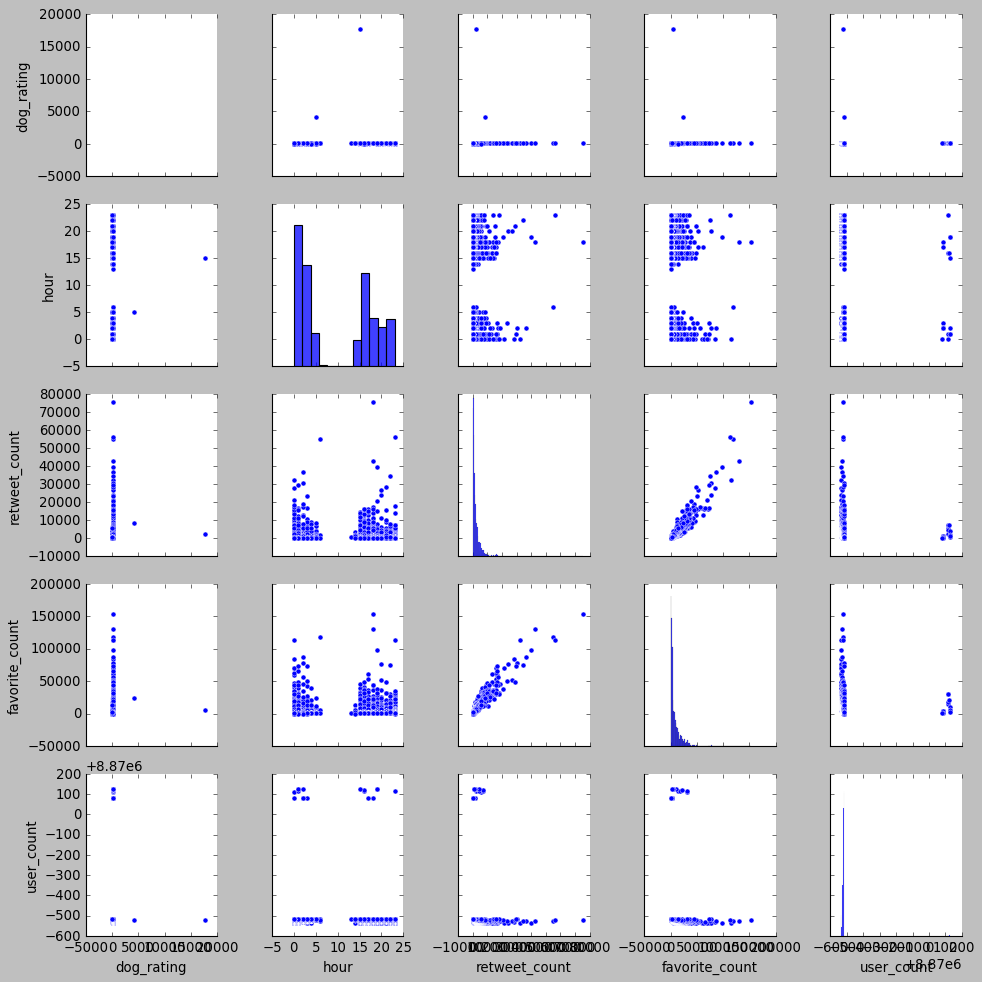

In [132]:
# Subplot grid for plotting pairwise relationships at twitter_archive_master dataset
g = sns.pairplot(twitter_archive_master)

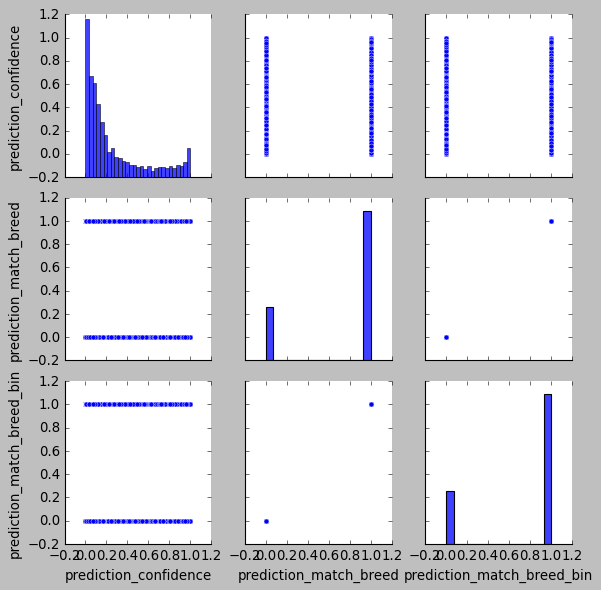

In [133]:
# Subplot grid for plotting pairwise relationships at image_prediction dataset
sns.pairplot(image_prediction)

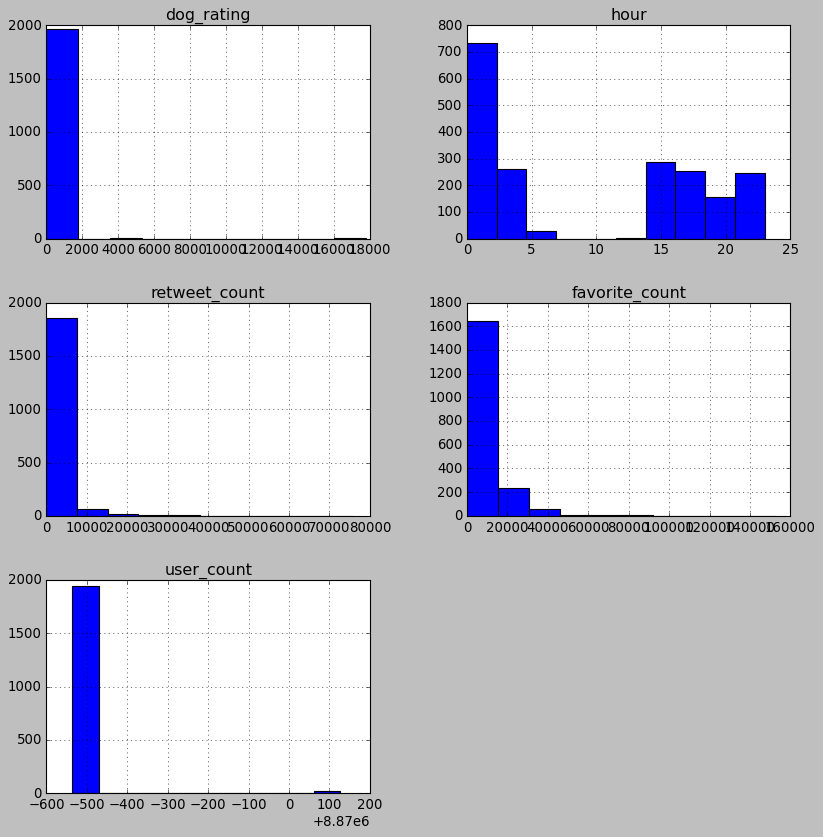

In [134]:
twitter_archive_master.hist(figsize = (12,12));

<AxesSubplot:>

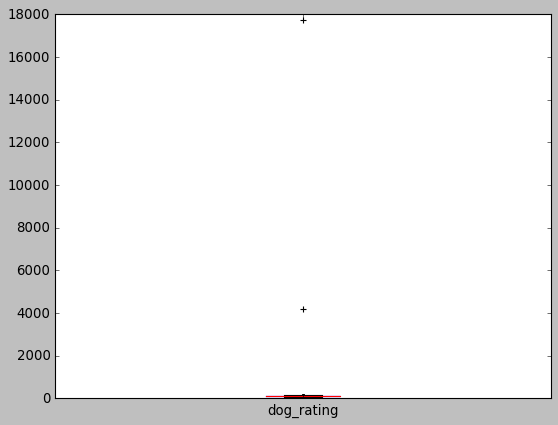

In [135]:
twitter_archive_master['dog_rating'].plot(kind='box')

In [136]:
twitter_archive_master.query('dog_rating > 4000')

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,dog_rating,date,time,hour,retweet_count,favorite_count,user_count
715,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,NaN,17760.0,2016-07-04,15:00:45,15,2415,5035,8869478
1688,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,None,NaN,4200.0,2015-11-29,05:52:33,5,8104,23280,8869480


<AxesSubplot:>

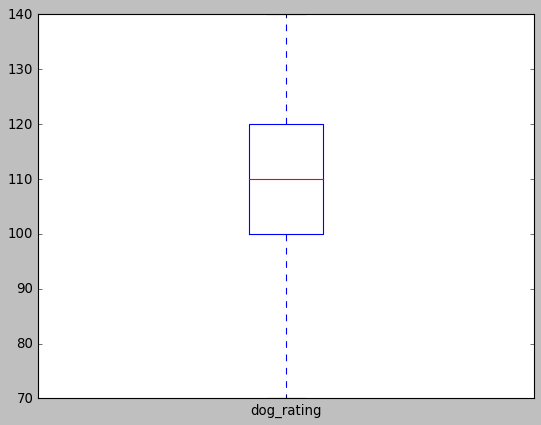

In [137]:
twitter_archive_master['dog_rating'].plot(kind='box', showfliers=False)

<AxesSubplot:>

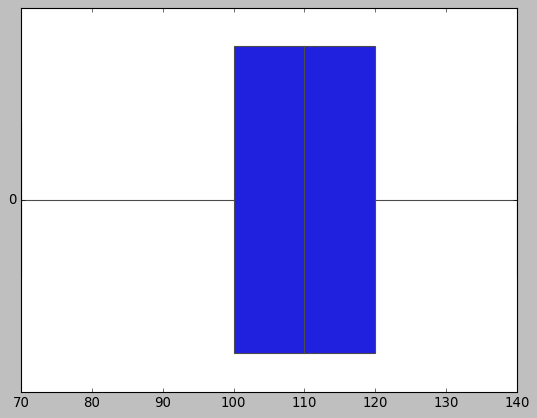

In [138]:
sns.boxplot(data=twitter_archive_master['dog_rating'],orient="h", showfliers=False) 

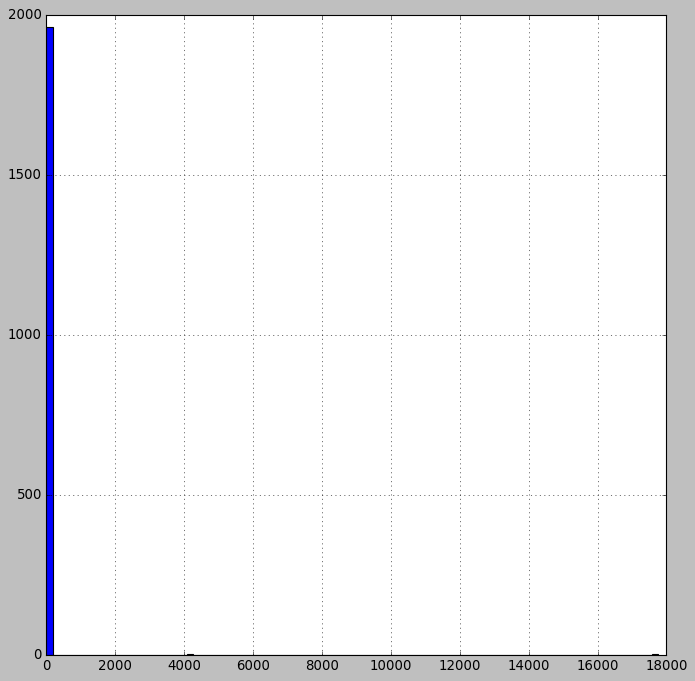

In [139]:
twitter_archive_master.dog_rating.hist(bins=100, figsize=(10,10));

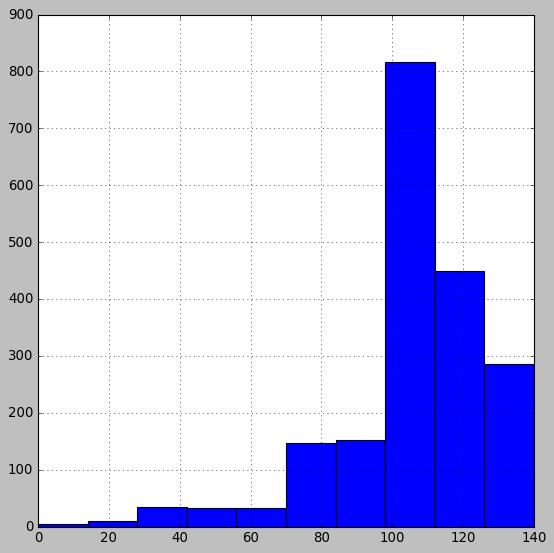

In [140]:
# Creating a plot communicating the conclusion using pandas.plot ()
twitter_archive_master.dog_rating.hist(bins=None, range=(0, 140), figsize=(8,8));

<AxesSubplot:title={'center':'Average dog_rating by dog_stage'}, xlabel='dog_stage'>

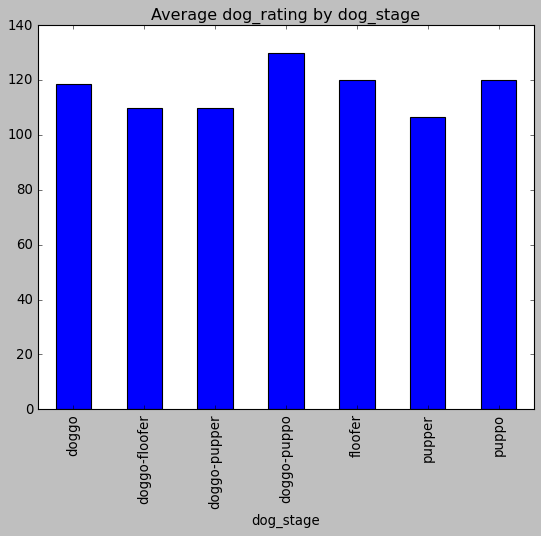

In [141]:
#creating a plot communicating the conclusion uisng pandas.plot ()
twitter_archive_master.groupby(['dog_stage'])['dog_rating'].mean().plot(kind='bar', title='Average dog_rating by dog_stage',  alpha=1)

<AxesSubplot:xlabel='dog_stage', ylabel='dog_rating'>

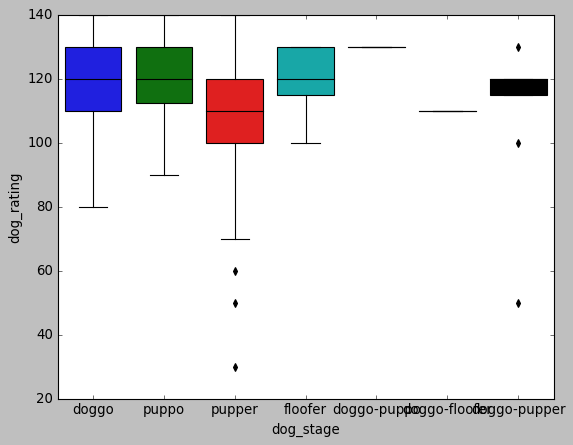

In [142]:
# Normal Boxplot
sns.boxplot(x="dog_stage", 
            y="dog_rating",
            data=twitter_archive_master)

## Section 2: Research Questions & Conclusion
**Q1_ What are the main devices/apps that WeRateDogs' users use?**
Chart

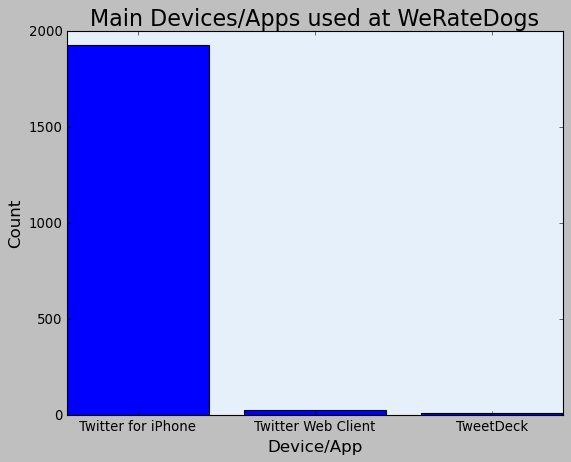

In [143]:
# Create a bar chart demonstrates Main Device/Apps which used by WeRateDogs users

x = twitter_archive_master.source.unique()
y = twitter_archive_master.source.value_counts()
plt.bar(x, y, width=0.8)
plt.title('Main Devices/Apps used at WeRateDogs', fontsize=20)
plt.xlabel('Device/App', fontsize=15)
plt.ylabel('Count', fontsize=15)


ax = plt.axes()
ax.set_facecolor('#e6f0fa')


# Conclusion
Most of WeRateDogs' users are using 'Twitter for iPhone' using Twitter.

### Q2_ Is there a relationship between dog rates and retweet count?
Chart

(11.0, 75802.0)

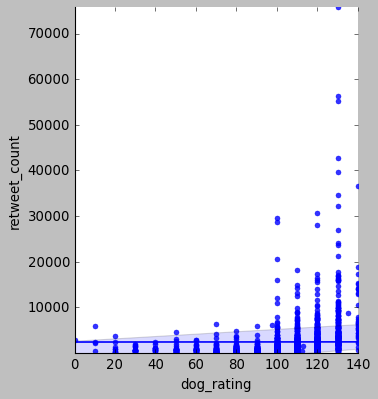

In [144]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot(x="dog_rating", 
           y="retweet_count",
           data=twitter_archive_master)
plt.xlim(0, 140)
plt.ylim(11, 75802)

#### Conclusion
**t is clear that there is a Positive relationship between dog_rating & retweet_count.**

#### Q3_ Is there a relationship between dog rates and favorite count?
Chart

(70.0, 153082.0)

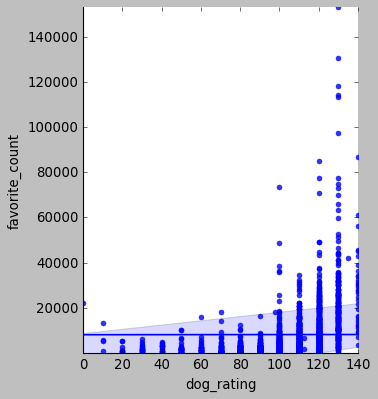

In [145]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot(x="dog_rating", 
           y="favorite_count",
           data=twitter_archive_master)
plt.xlim(0, 140)
plt.ylim(70, 153082)

#### Conclusion
It is clear that there is a Positive relationship between dog_rating & favorite_count.

### Q4_ Is there a relationship between favorite count retweet count?
Chart

(11.0, 75802.0)

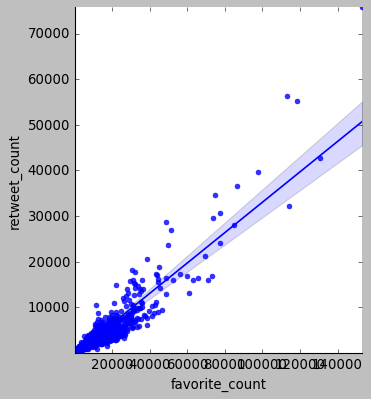

In [146]:
# Plot data and regression model fits across a FacetGrid
sns.lmplot(x="favorite_count", 
           y="retweet_count",
           data=twitter_archive_master)
plt.xlim(70, 153082)
plt.ylim(11, 75802)

### Conclusion
It is clear that there is a Strong Positive relationship between favorite_count & retweet_count.

**Q5_ What time that most of tweets are tweeted at?**

Text(0, 0.5, 'Count of Tweets')

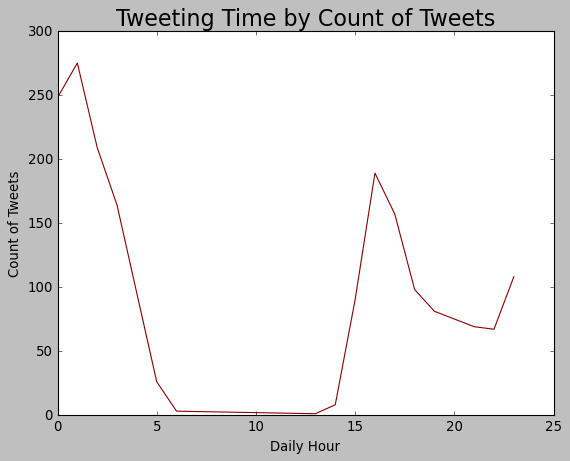

In [148]:
# Plot a Line Chart
twitter_archive_master.groupby(
    ['hour'])['tweet_id'].count().plot(
    kind='line', title='Predection/Reality Check', color=['darkred', 'Green'], alpha=1)


plt.title('Tweeting Time by Count of Tweets', fontsize=20)
plt.xlabel('Daily Hour', fontsize=12)
plt.ylabel('Count of Tweets', fontsize=12)

## Conclusion
The majority of tweets were tweeted during hours [12:00 AM to 03:00 AM] and [03:00 PM to 06:00 PM].


#### Q6_ Is high confidence prediction meet reality more than low ones?

Text(0, 0.5, 'Average of Confidence Level')

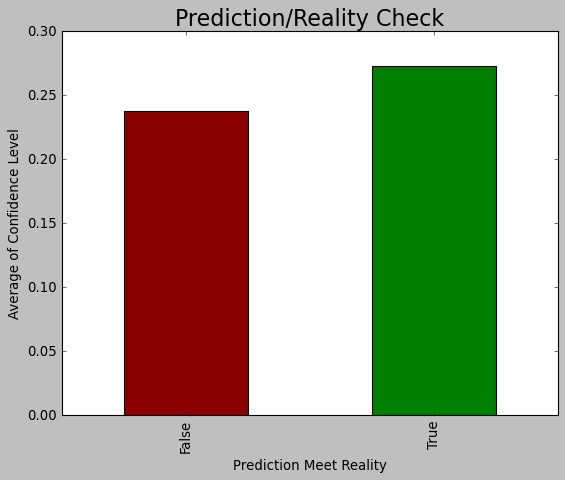

In [149]:
# Create a bar chart demonstrates Prediction Meet Reality values (True/False) Vs. Confidence Level

image_prediction.groupby(
    ['prediction_match_breed'])['prediction_confidence'].mean().plot(
    kind='bar', title='Predection/Reality Check', color=['darkred', 'Green'], alpha=1)


plt.title('Prediction/Reality Check', fontsize=20)
plt.xlabel('Prediction Meet Reality', fontsize=12)
plt.ylabel('Average of Confidence Level', fontsize=12)

### 5. Making Reports
**Effort Report: 'wrangle_report.pdf'
This file will be saved as 'wrangle_report.pdf', it demonstrates all wrangling and data processing efforts.**

Insights Report: 'act_report.pdf'
Please check 'act_report.pdf', it demonstrate Analysis Conclusion.

# Thanks for your Time :)